In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import itertools
df=pd.read_csv('master.csv',encoding='ISO-8859-1')

C:\Users\lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type'},inplace=True)
df=df[['Event_ID','Year','Country','Region','AttackType','Killed','Wounded','Group','Target_type','Weapon_type','success']]
#Number of Terrorists participating in Attack  is  TerroristNumber
df.head(10)
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')

In [3]:
df.isnull().sum()

Event_ID           0
Year               0
Country            0
Region             0
AttackType         0
Killed         10313
Wounded        16311
Group              0
Target_type        0
Weapon_type        0
success            0
dtype: int64

In [4]:
df=df.dropna()
df.index = pd.RangeIndex(len(df.index))

In [5]:
df.shape

(164817, 11)

In [6]:
df=df[df.AttackType == 'Assassination']
df.head()

,Event_ID,Year,Country,Region,AttackType,Killed,Wounded,Group,Target_type,Weapon_type,success
0,197000000001,1970,Dominican Republic,Central America & Caribbean,Assassination,1.0,0.0,MANO-D,Private Citizens & Property,Unknown,1
2,197001000001,1970,Philippines,Southeast Asia,Assassination,1.0,0.0,Unknown,Journalists & Media,Unknown,1
4,197001020001,1970,Uruguay,South America,Assassination,0.0,0.0,Tupamaros (Uruguay),Police,Firearms,0
22,197001200001,1970,Guatemala,Central America & Caribbean,Assassination,1.0,0.0,Unknown,Government (Diplomatic),Unknown,1
105,197003050003,1970,United States,North America,Assassination,2.0,0.0,Armed Commandos of Liberation,Military,Firearms,1


In [7]:
df.shape

(17967, 11)

In [8]:
df=df[['Killed','Wounded','success']]

In [9]:
df.dtypes

Killed     float64
Wounded    float64
success      int64
dtype: object

In [10]:
df.head()

,Killed,Wounded,success
0,1.0,0.0,1
2,1.0,0.0,1
4,0.0,0.0,0
22,1.0,0.0,1
105,2.0,0.0,1


In [11]:
df.index = pd.RangeIndex(len(df.index))

In [12]:
features = df.drop(["success"], axis=1).values
target = df["success"].values

In [13]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [14]:
# train-test split for the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [15]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=6)

In [16]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
y_pred = model.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.9102207382674828

In [19]:
# let's check the f1 score
f1_score(y_test, y_pred)

0.9399503722084368

Normalized confusion matrix
[[0.80330223 0.19669777]
 [0.05252626 0.94747374]]


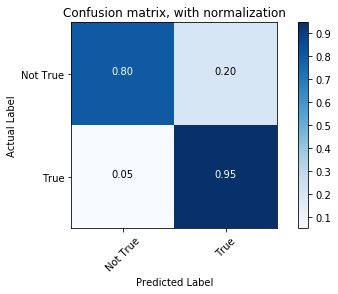

In [20]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Not True","True"], title='Confusion matrix, with normalization')

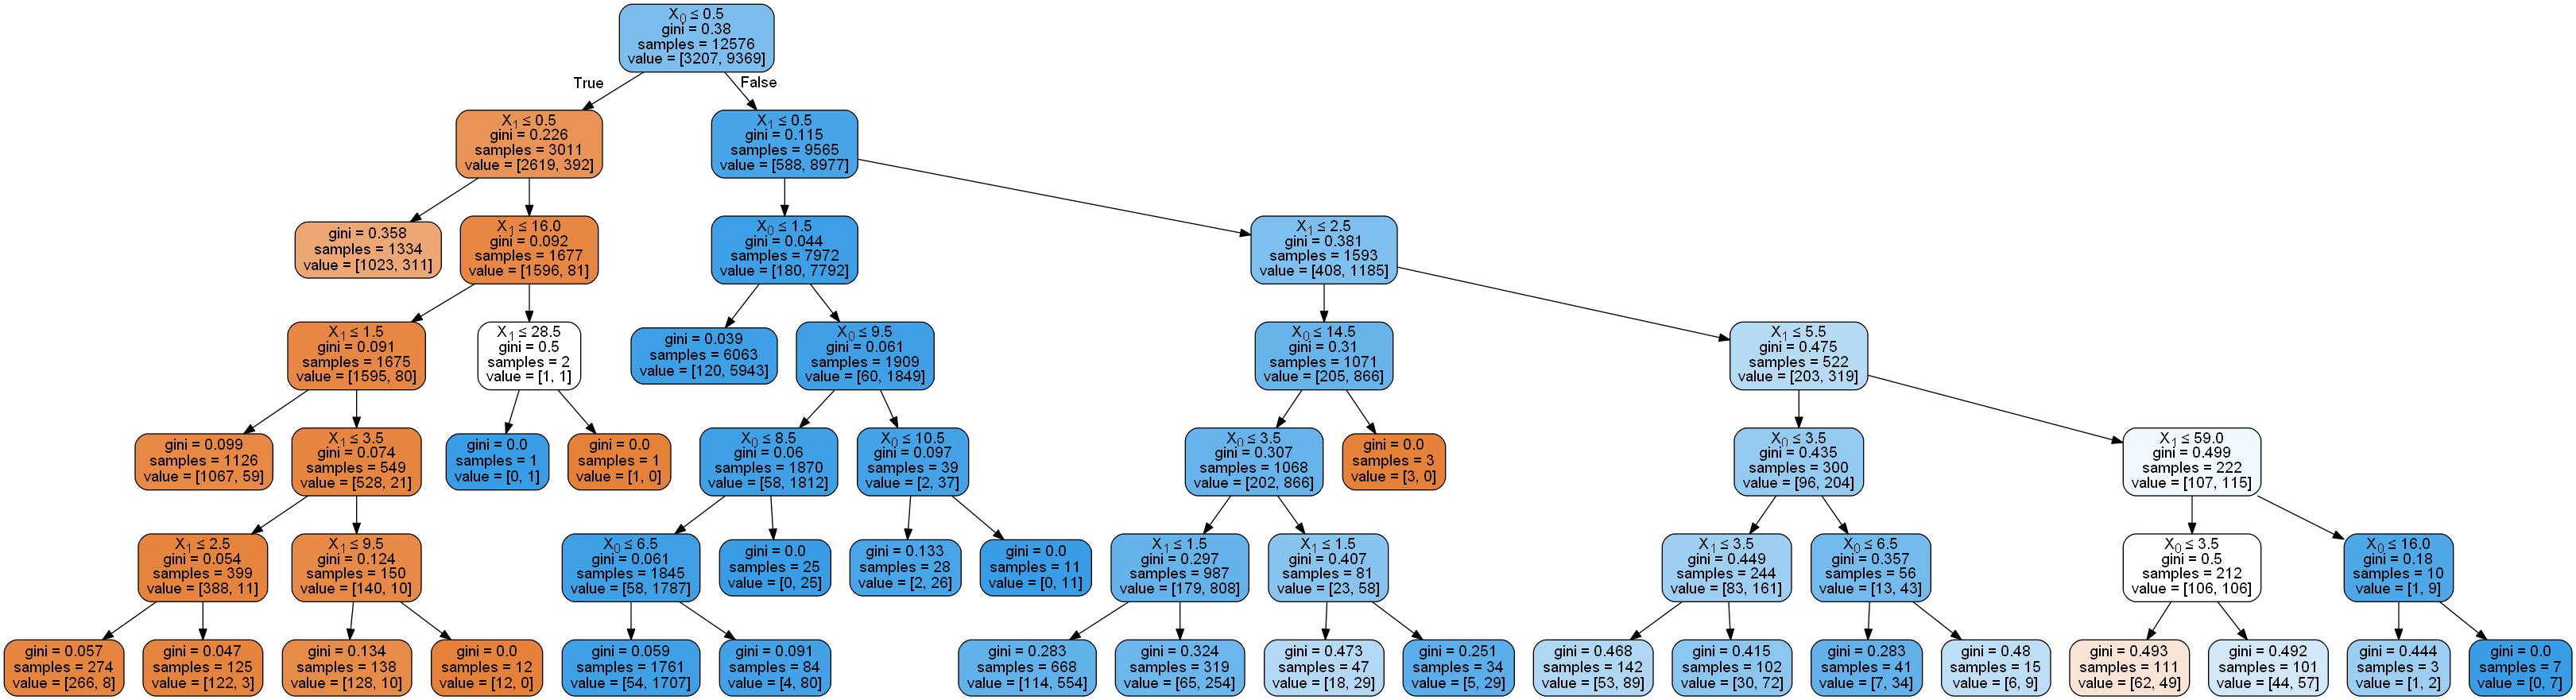

In [21]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())